In [36]:
import pandas as pd

df = pd.read_csv("Processed_Reviews.csv",encoding="ISO-8859-1")
df.shape
df.head()
print(df["lemmatized"])
print(df["label"])

0     product arrive time packaging great quality am...
1                                    product amaze love
2                    buy phone hz display totally worth
3                     wow product awesome bit expensive
4                            laptop work perfectly fine
5                             check full product detail
6                          great purchase happy product
7             battery life excellent charge cable short
8                   can not believe good expect quality
9            love product fast delivery amazing quality
10                    honest expect much oh god awesome
11                           best product ever use life
12       shoe comfortable fit nicely work perfectly jog
Name: lemmatized, dtype: object
0     positive
1     positive
2     positive
3     negative
4     positive
5     positive
6     positive
7     positive
8     positive
9     positive
10    positive
11    positive
12    positive
Name: label, dtype: object


In [40]:
df["label_clean"] = df["label"].astype(str).str.strip().str.lower()

df["label_numeric"] = df["label_clean"].map({
    "positive": 1,
    "negative": 0
})

print(df["label_numeric"])

0     1
1     1
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: label_numeric, dtype: int64


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf_vect = TfidfVectorizer()

# Fit and transform the lemmatized text
X_tfidf = tfidf_vect.fit_transform(df["lemmatized"].astype(str))

print(tfidf_vect.get_feature_names_out()[:20])  # show first 20 features

print(X_tfidf.shape)  # (num_samples, num_features)


['amaze' 'amazing' 'arrive' 'awesome' 'battery' 'believe' 'best' 'bit'
 'buy' 'cable' 'can' 'charge' 'check' 'comfortable' 'delivery' 'detail'
 'display' 'ever' 'excellent' 'expect']
(13, 53)


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Vectorize text using TF-IDF
tfidf_vect = TfidfVectorizer()
X = tfidf_vect.fit_transform(df["lemmatized"].astype(str))
y = df["label_numeric"]

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Naive Bayes classifier
nb_clf = MultinomialNB().fit(X_train, y_train)

# Predict and evaluate
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)

# Specify the labels explicitly for confusion matrix
labels = [0, 1]  # 0 for 'negative' and 1 for 'positive'
nb_cm = confusion_matrix(y_test, nb_predicted, labels=labels)


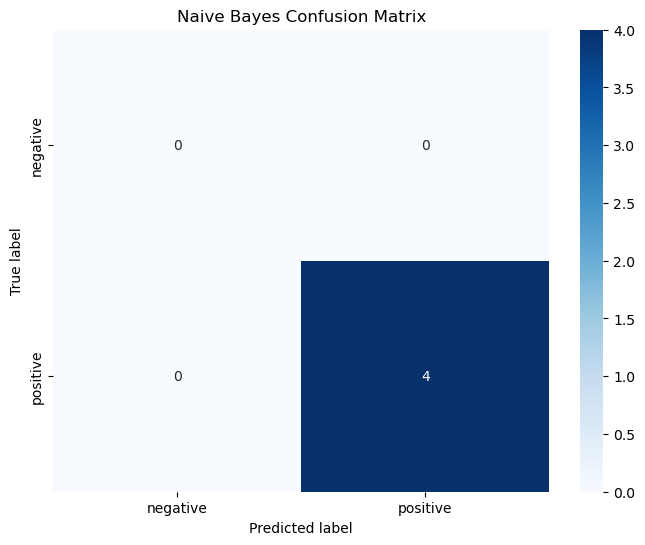

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Naive Bayes Error Rate: 0.00


In [58]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Function to plot confusion matrix 
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues): 
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes) 
    plt.title(title) 
    plt.xlabel('Predicted label') 
    plt.ylabel('True label') 
    plt.show() 
    
# Plot confusion matrix for Naive Bayes 
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix') 
print("Naive Bayes Classifier Report:") 
print(nb_report) 
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}") 